In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from panoradio_hf.data import IQDataModel
from panoradio_hf.net_utils import get_model_checkpoint_dir
from panoradio_hf.ccnn import ClassicalCNN
import matplotlib.pyplot as plt
import lightning as pl
import pandas as pd
import numpy as np
import joblib as jl
import matplotlib as mpl
from panoradio_hf.net_utils import evaluate_model_predictions
import seaborn as sns
import os
from panoradio_hf.net_utils import get_model_checkpoint_dir
from panoradio_hf.net_utils import initialize_pl_trainer
%matplotlib inline

In [5]:
train_model = False

if train_model:
    iqdata = IQDataModel()
    model = ClassicalCNN()

    callbacks, mlf_logger = initialize_pl_trainer("classical-cnn")
    
    trainer = pl.Trainer(callbacks=callbacks,
                         max_epochs=100,
                         logger=mlf_logger)
    trainer.fit(model, iqdata)

In [6]:
ls /home/mspcvsp/ModelCheckpoints/panorado_hf/classical-cnn/

'epoch=26-val_loss=0.00-other_metric=0.00.ckpt'


In [7]:
model_checkpoint = "epoch=26-val_loss=0.00-other_metric=0.00.ckpt"

model_checkpoint_pth =\
    get_model_checkpoint_dir("classical-cnn").joinpath(model_checkpoint)

model = ClassicalCNN.load_from_checkpoint(model_checkpoint_pth)
trainer = pl.Trainer()
predictions = trainer.predict(model,
                              datamodule=IQDataModel())

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                          | 0/? [00:00<?, ?it/s]

In [13]:
from panoradio_hf.net_utils import init_snrid_accuracy

Text(0.5, 0, 'SNR [dB]')

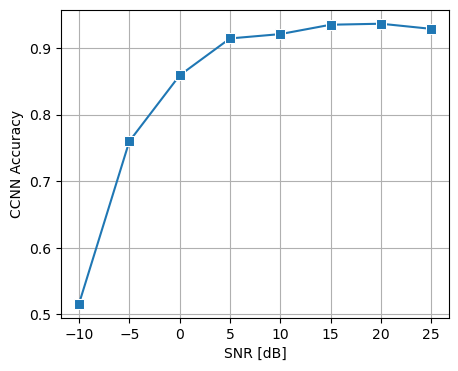

In [15]:
snrid_clf_report, snrid_conf_mat =\
    evaluate_model_predictions(predictions)

cnn_snrid_acc = init_snrid_accuracy(snrid_clf_report)

h_ax = plt.figure(figsize=(5, 4)).gca()
sns.lineplot(ccnn_snrid_acc,
             x="snr",
             y="ccnn",
             marker="s",
             markersize=7,
             ax=h_ax)
h_ax.grid(True)
h_ax.set_ylabel("CCNN Accuracy")
h_ax.set_xlabel("SNR [dB]")